# Exercise 03

## Exercise H3.1: Multilayer Perceptrons (MLP)

### a, b) Creating 50 MLPs and plotting them

**Importing libraries & Defining the classes**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

class Weights:
    """
    Weights generation class, works by constructing
    [
        [
            hidden_to_x0,
            hidden_to_x1,
        ],
        [
            output_to_hidden
        ]
    ]
    where hidden_to_x0, hidden_to_x1 and output_to_hidden are numpy arrays.
    """
    
    def generate_random(self):
        """
        Generates weights as following:
            - Array of weights between hidden layer and input layer:
                - hidden nodes <=> x0 (from -2 to 2 uniformly distributed)
                - hidden nodes <=> x1 (from 0 to 2 normally distributed)
            - Array of weights between output layer and hidden layer:
                - output node <=> hidden nodes (from 0 to 1 normally distributed)
        Note that x0 is the bias

        Returns array(size 2) of arrays containing numpy vectors (each of size 10)
        """
        output_to_hidden = np.random.normal(0, 1, 10)
        hidden_to_x1 = np.random.normal(0, 2, 10)
        hidden_to_x0 = np.random.uniform(-2, 2, 10)
        return [[hidden_to_x0, hidden_to_x1], [output_to_hidden]]
        

class MLP:
    """
    MLP class that takes a confiugration (weights)
    and evaluates the output y(x) based on given x.
    """
    def __init__(self, weights):
        self.weights = weights
        self.size = len(weights[0][0])
    
    def transfer_function(self, h_input):
        """
        Evaluates the h_input

        Returns tanh(h_input)
        """
        return np.tanh(h_input)
    
    def evaluate_output(self, input_data):
        """
        Given input_data x, evaluates the output of the neuron
        using the weights of the MLP.
         - Weights of hidden layer <=> x:      self.weights[0][1]
         - Weights of hidden layer <=> bias:   self.weights[0][0]
         - Weights of output layer <=> hidden: self.weights[1][0]
        
        Returns a scalar output.
        """
        h = np.dot(self.weights[0][1], input_data) - self.weights[0][0]
        output = np.dot(self.weights[1][0], np.tanh(h))
        return output
    
    def evaluate_multiple(self, multiple_inputs):
        """
        Evaluates multiple inputs by running self.evaluate_output() on each input_value
        
        Returns array of scalar outputs
        """
        return [self.evaluate_output(input_value) for input_value in multiple_inputs]

# Testing the network
weights = Weights().generate_random()
MLP(weights).evaluate_output(-2)

-2.623306051549537

**Initiating 50 weights sets and plotting data**

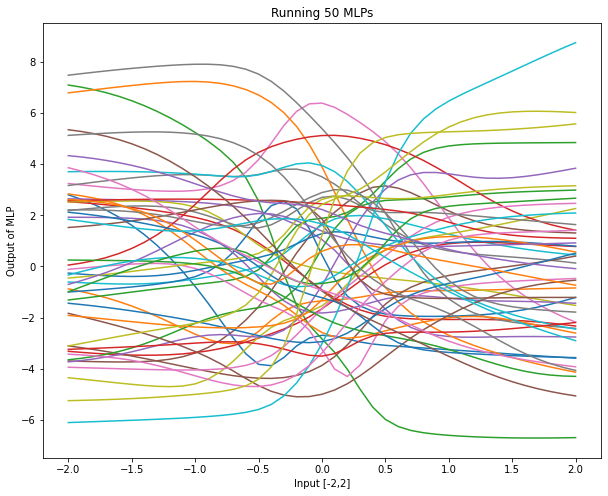

In [100]:
NO_OF_MLPS = 50

def plot_results(inputs, all_results):
    plt.figure(figsize=(10,8))

    for result_set in all_results:
        plt.plot(inputs, result_set)

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Input [-2,2]")
    plt.ylabel("Output of MLP")
    plt.title("Running 50 MLPs")
    # plt.legend()
    plt.show()


inputs = list(np.arange(-2,2.1, 0.1))
fifty_weights = [Weights().generate_random() for _ in range(NO_OF_MLPS)]
all_results = [MLP(weights).evaluate_multiple(inputs) for weights in fifty_weights]

plot_results(inputs, all_results)

### c) Using different initialization scheme

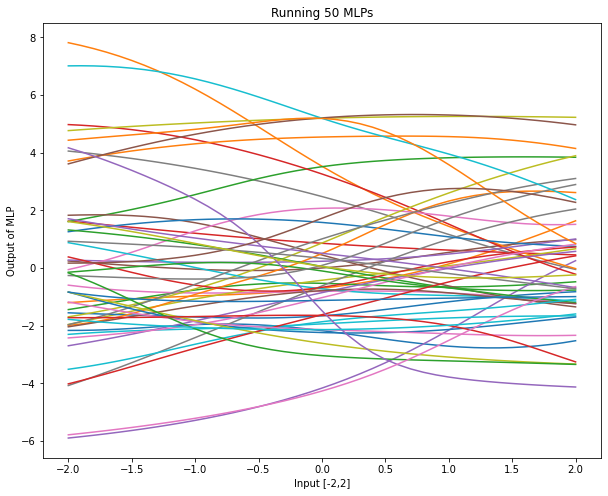

In [101]:
class DifferentWeights(Weights):
    """
    A different Weights class that inherits from base Weights class
    """
    def generate_random(self):
        output_to_hidden = np.random.normal(0, 1, 10)
        hidden_to_x1 = np.random.normal(0, 0.5, 10)
        hidden_to_x0 = np.random.uniform(-2, 2, 10)
        return [[hidden_to_x0, hidden_to_x1], [output_to_hidden]]

fifty_other_weights = [DifferentWeights().generate_random() for _ in range(NO_OF_MLPS)]
all_other_results = [MLP(weights).evaluate_multiple(inputs) for weights in fifty_other_weights]

plot_results(inputs, all_other_results)

### d) Calculating MSE

In [117]:
def mse(A, B):
    return (np.square(np.array(A) - np.array(B))).mean()

def analyse_mlp(desired, results, prefix=""):
    print("========================")
    print("{} MLP".format(prefix))
    mlp_sum = 0
    for idx, result in enumerate(results):
        mse_res = mse(result, g_x)
        mlp_sum += mse_res
        print("  {} - MSE: {}".format(idx, mse_res))
    print("TOTAL MSE: {}".format(mlp_sum))

g_x = [-1 * x for x in inputs]
analyse_mlp(g_x, all_results, prefix="First")
analyse_mlp(g_x, all_other_results, prefix="Second")


First MLP
  0 - MSE: 5.536390650719595
  1 - MSE: 4.873271996454019
  2 - MSE: 20.876954836790784
  3 - MSE: 0.7756756122633113
  4 - MSE: 1.6854116818532106
  5 - MSE: 13.504209717278522
  6 - MSE: 12.10182589681116
  7 - MSE: 5.7108777804841475
  8 - MSE: 0.43370738528715486
  9 - MSE: 4.021879518648132
  10 - MSE: 2.2886167232721046
  11 - MSE: 17.97636716865593
  12 - MSE: 16.33786563491701
  13 - MSE: 10.749900617490212
  14 - MSE: 0.6632616161469288
  15 - MSE: 13.509355179440218
  16 - MSE: 3.2313000888592236
  17 - MSE: 23.237158010633497
  18 - MSE: 16.148300069606368
  19 - MSE: 5.285477718292007
  20 - MSE: 3.193519407170371
  21 - MSE: 1.8773820484308317
  22 - MSE: 13.835594067280898
  23 - MSE: 14.08016397124471
  24 - MSE: 17.74958604261728
  25 - MSE: 12.952341844847389
  26 - MSE: 16.21457023240454
  27 - MSE: 5.532245325531298
  28 - MSE: 9.032142183447807
  29 - MSE: 49.83502105505596
  30 - MSE: 6.447078423106704
  31 - MSE: 7.303605486602568
  32 - MSE: 3.509357022

**Summary**
- First MLP has total MSE of 472.45
- Second MLP has total MSE of 375.5
- Second MLP has less MSE and approximates the function g(x) better

----------------------------------------------------------------
## Exercise H3.2: MLP Regression

### A) Intialization

In [ ]:
class MLP:
    """
    MLP class that takes a confiugration (weights)
    and evaluates the output y(x) based on given x.
    """
    def __init__(self, weights):
        self.weights = weights
        self.size = len(weights[0][0])
    
    def transfer_function(self, h_input):
        """
        Evaluates the h_input

        Returns tanh(h_input)
        """
        return np.tanh(h_input)
    
    def evaluate_output(self, input_data):
        """
        Given input_data x, evaluates the output of the neuron
        using the weights of the MLP.
         - Weights of hidden layer <=> x:      self.weights[0][1]
         - Weights of hidden layer <=> bias:   self.weights[0][0]
         - Weights of output layer <=> hidden: self.weights[1][0]
        
        Returns a scalar output.
        """
        h = np.dot(self.weights[0][1], input_data) - self.weights[0][0]
        output = np.dot(self.weights[1][0], np.tanh(h))
        return output
    
    def feed_forward():
        return 1
    
    def cost_of_layer():
        return 1
    
    def update_weigts():
        return 1
    